# サポートベクターマシン

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

$$  
    y = \omega_0 + \sum^{n}_{i=1}{\omega_i}x_i = \omega_0 + \boldsymbol{\omega^T {x}} \\
    \verb| Maximize |_{(\omega_0, \ \boldsymbol{\omega})} \frac{1}{\|\boldsymbol{\omega}\|}
$$

$$
    \verb| Minimize |_{(\omega_0, \ \boldsymbol{\omega})} \frac{1}{2}{\|\boldsymbol{\omega}\|}^2 \\
    \verb| Subject to | y_i (\omega_0 + \boldsymbol{\omega}^T x_i)\geq1
$$

$$
    \begin{align}
            &\omega_j = \sum_{i=1}^{n}{a_i}{y_i}{x_{ij}} \ \ (j=1,\ldots, d)\\
            \verb| Minimize | & f(\boldsymbol{a}) = \sum_{k=1}^{n}a_k - \frac{1}{2}\sum_{k=1}^{n}\sum_{l=1}^{n}{a_k}{a_l}{y_k}{y_l}{x_k^T}{x_l} \\
            \verb| Subject to | &\sum_{i=1}^{n}{a_i}{y_i} = 0 \\
             & a_i\geq0 \\
             & a_i\{y_i (\omega_0 + \boldsymbol{\omega}^T x_i) - 1\}=0 \\
    \end{align}
$$

$$
    \begin{align}
        &\hat{a}_i = \frac{1}{\|x_i - x_j\|^2}\left\{1 - {y_i}{y_j} + y_i(x_i - x_j)^T\left(x_j\sum_{k\neq{i,j}}{a_k}{y_k} - \sum_{k\neq{i,j}}{a_k}{y_k}{x_k}\right)\right\} \\
        &\hat{a}_j = y_j \left(-\hat{a}_i - \sum_{k\neq{i,j}}{a_k}{y_k} \right) \\
        &\nabla{f}(a)_t = 1 - \sum_{l=1}^{n}{a_i}{y_t}{y_l}\boldsymbol{{x_t^T}{x_l}} \\
        & i = \verb| argmin|_{(t\in I_{-}(y,a))}{ {y_t}\nabla{f}(a)_t} & I_{-}(\boldsymbol{y,a})) =\{ t|y_t=-1 \verb| or | a_t > 0 \}\\
        & j = \verb| argmin|_{(t\in I_{+}(y,a))}{ {y_t}\nabla{f}(a)_t} & I_{+}(\boldsymbol{y,a})) =\{ t|y_t=1 \verb| or | a_t > 0 \}\ \\
        &\omega_j = \sum_{i=1}^{n}{a_i}{y_i}{x_{ij}} & (j=1,\ldots, d) \ ({a_i}\neq{0}) \\
        &\omega_0 = \frac{1}{|S|} \sum_{k\in S}\left( y_k - \sum_{l\in S}{a_l}{y_l}\boldsymbol{{x_k^T}{x_l}} \right)
    \end{align}
$$

## 分離可能な場合

In [2]:
from solver import SVCHard

In [3]:
np.random.seed(1)
X0 = np.random.randn(20, 2)  # "+"の(x,y)を20点
X1 = np.random.randn(20, 2) + np.array([5, 5])  # "*"の(x,y)を20点

In [4]:
y = np.array([1] * 20 + [-1] * 20)
X = np.r_[X0, X1]

In [5]:
model = SVCHard()
model.fit(X, y)

ai=0.061626, a[i]=0.000000
ai=0.034406, a[i]=0.000000
ai=0.038089, a[i]=0.061626
ai=0.032089, a[i]=0.000000
ai=0.014588, a[i]=0.038089
ai=0.063677, a[i]=0.032089
ai=0.000000, a[i]=0.014588
ai=0.055775, a[i]=0.034406
ai=0.063677, a[i]=0.063677


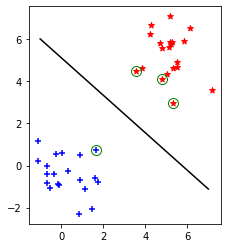

In [6]:
def f(model, x):
    return (-model.w0_ - model.w_[0] * x) / model.w_[1]

plt.axes().set_aspect('equal')

x1, x2 = -1, 7
y1, y2 = f(model, x1), f(model, x2)
plt.plot([x1, x2], [y1, y2], color="k")

plt.scatter(X0[:, 0], X0[:, 1], color="b", marker="+")
plt.scatter(X1[:, 0], X1[:, 1], color="r", marker="*")

plt.scatter(X[model.a_ != 0, 0], X[model.a_ != 0, 1], s=100, color=(0,0,0,0), edgecolor="g", marker="o")

plt.show()

In [7]:
print(model.a_)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.19451950e-01
 6.93889390e-18 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.36767029e-02
 0.00000000e+00 5.57752473e-02 0.00000000e+00 0.00000000e+00]


In [8]:
print(model.predict(X))

[ 1.56106023  2.42760363  2.4220329   1.57630844  1.85301333  2.14052053
  2.11024244  1.89786081  2.2411511   1.64020838  1.80684767  1.39043255
  1.82211152  2.24613182  1.75996037  2.23473298  2.39638232  2.0884087
  2.14335411  1.05715917 -1.19074977 -1.94887029 -1.36067958 -2.40172882
 -1.83935801 -1.54519777 -1.07789876 -1.72141153 -2.18688624 -1.99051456
 -1.78663818 -1.63396573 -1.70697376 -2.49601245 -1.77747572 -0.92356857
 -1.94649246 -0.94284083 -1.7776026  -1.92771581]


## 分離不可能な場合

$$
    \begin{align}
            \verb| Minimize | & f(\boldsymbol{a}) = \sum_{k=1}^{n}a_k - \frac{1}{2}\sum_{k=1}^{n}\sum_{l=1}^{n}{a_k}{a_l}{y_k}{y_l}{x_k^T}{x_l} \\
            \verb| Subject to | &\sum_{i=1}^{n}{a_i}{y_i} = 0 \\
             & 0 \leq a_i \leq C
    \end{align}
$$

$$
    \begin{align}
        i = \verb| argmin|_{(t\in I_{-}(y,a))}{ {y_t}\nabla{f}(a)_t} \\
        j = \verb| argmin|_{(t\in I_{+}(y,a))}{ {y_t}\nabla{f}(a)_t} 
    \end{align}
$$

$$
    \left\{
        \begin{array}{l}
             I_{-}(\boldsymbol{y,a})) =\{ t|(a_t > 0 \verb| and | y_t=1) \verb| or | (a_t < C \verb| and | y_t=-1) \} \\
             I_{+}(\boldsymbol{y,a})) =\{ t|(a_t > 0 \verb| and | y_t=-1) \verb| or | (a_t < C \verb| and | y_t=1) \}
        \end{array}
    \right.
$$

In [9]:
from solver import SVCSoft

In [10]:
np.random.seed(0)
n = 20
X0 = np.random.randn(n, 2)  # "+"の(x,y)をn点
X1 = np.random.randn(n, 2) + np.array([2.5, 2.5])  # "*"の(x,y)をn点

In [11]:
y = np.array([1] * n + [-1] * n)
X = np.r_[X0, X1]

In [12]:
model = SVCSoft(C=1)
model.fit(X, y)

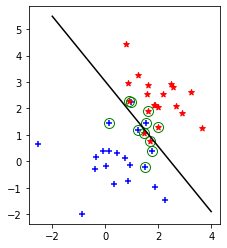

In [13]:
def f(model, x):
    return (-model.w0_ - model.w_[0] * x) / model.w_[1]

plt.axes().set_aspect('equal')

x1, x2 = -2, 4
y1, y2 = f(model, x1), f(model, x2)
plt.plot([x1, x2], [y1, y2], color="k")

plt.scatter(X0[:, 0], X0[:, 1], color="b", marker="+")
plt.scatter(X1[:, 0], X1[:, 1], color="r", marker="*")

plt.scatter(X[model.a_ != 0, 0], X[model.a_ != 0, 1], s=100, color=(0,0,0,0), edgecolor="g", marker="o")

plt.show()

In [14]:
print(model.a_)

[1.         1.         0.         0.         0.         0.35629849
 0.         0.         0.26269129 0.         0.         0.
 0.         0.         1.         0.         0.         0.
 1.         0.         1.         0.         0.         0.
 1.         0.         1.         0.         0.         0.
 0.         1.         0.         0.         0.         0.
 0.         0.         0.61898977 0.        ]


In [15]:
y_pred = model.predict(X)
print("正しく分類できた数={0:d}".format( (y_pred == y).sum() ))

正しく分類できた数=36


## カーネル法

In [16]:
from solver import SVCKernel

In [17]:
np.random.seed(0)
n = 100
X0 = np.random.randn(n, 2)  # "+"の(x,y)をn点
X1 = np.random.randn(n, 2) + np.array([2.5, 2.5])  # "*"の(x,y)をn点

In [18]:
y = np.array([1] * n + [-1] * n)
X = np.r_[X0, X1]

In [19]:
C=1
model = SVCKernel(C=C)
model.fit(X, y)

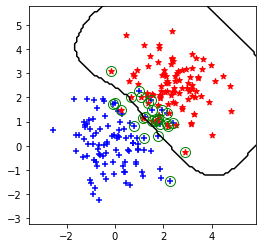

In [20]:
plt.axes().set_aspect('equal')
plt.scatter(X0[:, 0], X0[:, 1], color="b", marker="+")
plt.scatter(X1[:, 0], X1[:, 1], color="r", marker="*")

xmin, xmax = X[:, 0].min(), X[:, 0].max()
ymin, ymax = X[:, 1].min(), X[:, 1].max()
xmesh, ymesh = np.meshgrid(np.linspace(xmin-5, xmax+5, 200), np.linspace(ymin-5, ymax+5, 200))
zmesh = model.predict(np.c_[xmesh.ravel(), ymesh.ravel()]).reshape(xmesh.shape)
plt.contour(xmesh, ymesh, zmesh, levels=[0], colors="k")

plt.scatter(X[model.a_ == C, 0], X[model.a_ == C, 1], s=100, color=(0,0,0,0), edgecolor="g", marker="o")

plt.xlim(xmin-1, xmax+1)
plt.ylim(ymin-1, ymax+1)

plt.show()

In [21]:
print(model.a_)

[1.         1.         0.         0.         0.         0.
 0.         0.         0.36288241 0.         0.7276288  0.
 1.         0.         1.         0.         0.         0.
 1.         0.         0.09358674 0.47792582 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 1.         1.         0.         0.         0.         0.24930301
 0.         0.6470392  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.47306467 1.         0.         0.
 0.         0.         0.25241806 0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.81692677 0.16390084 0.         0.         0.
 0.         0.         1.         1.         0. 

In [22]:
y_pred = model.predict(X)
print("正しく分類できた数={0:d}".format( (y_pred == y).sum() ))

正しく分類できた数=190
